<a href="https://qworld.net" target="_blank" align="left"><img src="../images/header.jpg"  align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

<font style="font-size:28px;" align="left"><b> Управляемые операции на нескольких кубитах </b></font>
<br>
_подготовлено Maksim Dimitrijev, Abuzer Yakaryilmaz, переведено QRussia_
<br><br>
[<img src="../images/watch_lecture.jpg" align="left">](https://youtu.be/qvQrDjRRj28)
<br><br><br>

Вспомним, что при применении оператора CNOT, оператор NOT (отрицание) применяется к целевому кубиту только тогда, когда контролирующий кубит находится в состоянии $\ket{1}$:

$$ CNOT= \mymatrix{cc|cc}{\blackbit{1} & 0 & 0 & 0 \\ 0 & \blackbit{1} & 0 & 0 \\ \hline 0 & 0 & 0 & \bluebit{1} \\  0 & 0 & \bluebit{1} & 0} . $$

Как получить оператор, в котором оператор NOT будет применен к целевому кубиту тогда, когда контролирующий кубит в состоянии $ \ket{0} $?

$$ C_0NOT = \mymatrix{cc|cc}{0 & \bluebit{1} & 0 & 0 \\ \bluebit{1} & 0 & 0 & 0 \\ \hline 0 & 0 & \blackbit{1} & 0 \\  0 & 0 & 0 & \blackbit{1}} . $$

Как было отмечено в [Operators on Multiple Bits](../classical-systems/CS40_Operators_on_Multiple_Bits.ipynb), мы можем применить оператор $ NOT $ к контролирующему биту до применения оператора $ CNOT $. В результате получится, что оператор $ CNOT $ применяется к целевому кубиту, если контролирующий кубит будет в состоянии $ \ket{0} $. Для восстановления предыдущего значения контролирующего кубита мы применяем оператор $ NOT $ еще раз после применения оператора $ CNOT $. Коротко:
<ul>
    <li>применяем оператор $ NOT $ к контролирующему кубиту,</li>
    <li>применяем оператор $ CNOT $, и,</li>
    <li>применяем оператор $ NOT $ к контролирующему кубиту.</li>
</ul>

Мы можем реализовать это в Qiskit так.

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

q = QuantumRegister(2, "q")
c = ClassicalRegister(2, "c")

qc = QuantumCircuit(q,c)

qc.x(q[1])

qc.cx(q[1],q[0])

# Returning control qubit to the initial state
qc.x(q[1])

job = execute(qc,Aer.get_backend('unitary_simulator'), shots = 1)
U=job.result().get_unitary(qc,decimals=3)

print("CNOT(0) = ")
for row in U:
    s = ""
    for value in row:
        s = s + str(round(value.real,2)) + "  "
    print(s)

qc.draw(output="mpl", reverse_bits=True)

Используя этот трюк, можно реализовать более сложные условные операторы.

<h3>CCNOT</h3>

Рассмотрим гейт $ CCNOT $ : **controlled-controlled-not operator** ([Toffoli gate](https://en.wikipedia.org/wiki/Toffoli_gate)), который контролируется двумя кубитами. Реализация оператора $CCNOT$ в Qiskit следующая:

    circuit.ccx(control-qubit1,control-qubit2,target-qubit)

Оператор $ NOT $ применится к целевому кубиту тогда, когда оба контролирующих кубита будут в состоянии $\ket{1}$. Матричное представление этого оператора:

$$ CCNOT = \mymatrix{cc|cc|cc|cc}{\blackbit{1} & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & \blackbit{1} & 0 & 0 & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & \blackbit{1} & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & \blackbit{1} & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & \blackbit{1} & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & \blackbit{1} & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & 0 & 0 & 0 & \bluebit{1} \\ 0 & 0 & 0 & 0 & 0 & 0 & \bluebit{1} & 0}. $$

<h3>Задача 1</h3>

Реализуйте каждый из следующих операторов в Qiskit, используя три кубита. Проверьте вашу реализацию, используя бэкенд "unitary_simulator". <br><br>

<font size="-2">
$$
    C_0C_0NOT = \mymatrix{cc|cc|cc|cc}{0 & \bluebit{1} & 0 & 0 & 0 & 0 & 0 & 0 \\ \bluebit{1} & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & \blackbit{1} & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & \blackbit{1} & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & \blackbit{1} & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & \blackbit{1} & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & 0 & 0 & \blackbit{1} & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & \blackbit{1}}, ~~
    C_0C_1NOT = \mymatrix{cc|cc|cc|cc}{ \blackbit{1} & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & \blackbit{1} & 0 & 0 & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & 0 & \bluebit{1}  & 0 & 0 & 0 & 0 \\ 0 & 0 & \bluebit{1}  & 0 & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & \blackbit{1} & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & \blackbit{1} & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & 0 & 0 & \blackbit{1} & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & \blackbit{1}}, ~~ \mbox{and} ~~
    C_1C_0NOT = \mymatrix{cc|cc|cc|cc}{\blackbit{1} & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & \blackbit{1} & 0 & 0 & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & \blackbit{1} & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & \blackbit{1} & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & 0 & \bluebit{1} & 0 & 0 \\ 0 & 0 & 0 & 0 & \bluebit{1} & 0 & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & 0 & 0 & \blackbit{1} & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & \blackbit{1}}.   
$$
    </font>

In [ ]:
#
# your solution is here
#


<a href="Q80_Multiple_Control_Constructions_Solutions.ipynb#task1">click for our solution</a>

<h3>Больше контроля :)</h3>

Представим базовый метод того, как реализовать гейты $ NOT $ , контролируемые более чем двумя кубитами, используя $CNOT$, $ CCNOT $, и некоторые вспомогательных (ancilla) кубитов. 

*(Отметим, что в Qiskit есть метод "mct" для реализации таких гейтов. Другой оператор с несколькими контролирующими кубитами в Qiskit - "mcrz".)*

#### Реализация оператора CCCNOT

Оператор $ CCCNOT $ действует следующим образом: оператор $NOT$ применяется к целевому кубиту тогда, когда контролирующие кубиты находятся в состоянии $ \ket{111} $. Этому оператору требуется 4 кубита. Также мы будем использовать вспомогательный кубит. 

Наши кубиты $ q_{aux}, q_3, q_2, q_1, q_0 $; отметим, что вспомогательный кубит $q_{aux}$ должен быть в состоянии $\ket{0}$ после каждого использования. Далее приводится реализация оператора $ CCCNOT $ в Qiskit. Короткое объяснение дано в комментах.

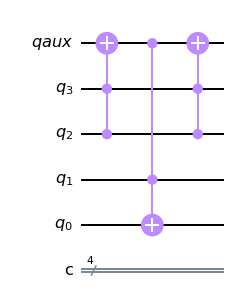

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qaux = QuantumRegister(1,"qaux")
q = QuantumRegister(4,"q")
c = ClassicalRegister(4,"c")

qc = QuantumCircuit(q,qaux,c)

# step 1: set qaux to |1> if both q3 and q2 are in |1>
qc.ccx(q[3],q[2],qaux[0])

# step 2: apply NOT gate to q0 if both qaux and q1 are in |1>
qc.ccx(qaux[0],q[1],q[0])

# step 3: set qaux to |0> if both q3 and q2 are in |1> by reversing the affect of step 1
qc.ccx(q[3],q[2],qaux[0])

qc.draw(output="mpl",reverse_bits=True)

Запустим данную схему для всех возможных входных значений и проверим правильность реализации экспериментально.

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_inputs=[]
for q3 in ['0','1']:
    for q2 in ['0','1']:
        for q1 in ['0','1']:
            for q0 in ['0','1']:
                all_inputs.append(q3+q2+q1+q0)
# print(all_inputs)                                  

print("input --> output")
for the_input in all_inputs:
    # create the circuit
    qaux = QuantumRegister(1,"qaux")
    q = QuantumRegister(4,"q")
    c = ClassicalRegister(4,"c")
    qc = QuantumCircuit(q,qaux,c)
    # set the initial value of the circuit w.r.t. the input
    if the_input[0] =='1': qc.x(q[3])
    if the_input[1] =='1': qc.x(q[2])
    if the_input[2] =='1': qc.x(q[1])
    if the_input[3] =='1': qc.x(q[0])
    # implement the CCNOT gates
    qc.ccx(q[3],q[2],qaux[0])
    qc.ccx(qaux[0],q[1],q[0])
    qc.ccx(q[3],q[2],qaux[0])
    # measure the main quantum register 
    qc.measure(q,c)
    # execute the circuit
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1)
    counts = job.result().get_counts(qc)
    for key in counts: the_output = key
    printed_str = the_input[0:3]+" "+the_input[3]+" --> "+the_output[0:3]+" "+the_output[3]
    if (the_input!=the_output): printed_str = printed_str + " the output is different than the input"
    print(printed_str)

<h3>Задача 2</h3>

Напишите реализацию оператора NOT, контролируемого 4 кубитами ($CCCCNOT$) в Qiskit. Проверьте корректность, выполнив ваше решение для всех возможных входных данных. (См. пример выше)

*Вы можете использовать два вспомогательных кубита.*

In [ ]:
#
# your solution is here
#


<a href="Q80_Multiple_Control_Constructions_Solutions.ipynb#task2">click for our solution</a>

<h3>Задача 3</h3>

Повторите Задачу 2 для оператора $C_1C_0C_1C_0NOT$: оператор $NOT$ применяется к целевому кубиту, если четыре контролирующих кубита находятся в состоянии $ \ket{1010} $.

In [ ]:
#
# your solution is here
#


<a href="Q80_Multiple_Control_Constructions_Solutions.ipynb#task3">click for our solution</a>

<h3>Задача 4 (extra)</h3>

Напишите функцию, принимающую на вход бинарную строку "$ b_1 b_2 b_3 b_4$, которая повторяет Задачу 2 для оператора $ C_{b_1}C_{b_2}C_{b_3}C_{b_4}NOT $ , где $ b_1,\ldots,b_4$ биты и $ NOT $ оператор применяется к целевому кубиту, если контролирующие кубиты находятся в состоянии $ \ket{b_1b_2b_3b_4} $.

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

def c4not(control_state='1111'):
    #
    # your code is here
    #
    

In [ ]:
# try different values

#c4not()
#c4not('1001')
c4not('0011')
#c4not('1101')
#c4not('0000')

<a href="Q80_Multiple_Control_Constructions_Solutions.ipynb#task4">click for our solution</a>